In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import random
import torch

from src.action import Action
from src.agent import Agent
from src.config import Config
from src.episode import Episode
from src.policy import Policy
from src.state import State
from src.world import World

# Random agent action history
----

In [2]:
episode = Episode.new()

In [3]:
for step in range(20):
    action_idx = random.randint(0, len(episode.config.possible_actions) - 1)
    episode.agent.take_action(
        action=Action.create_from(config=episode.config, action_idx=action_idx)
    )

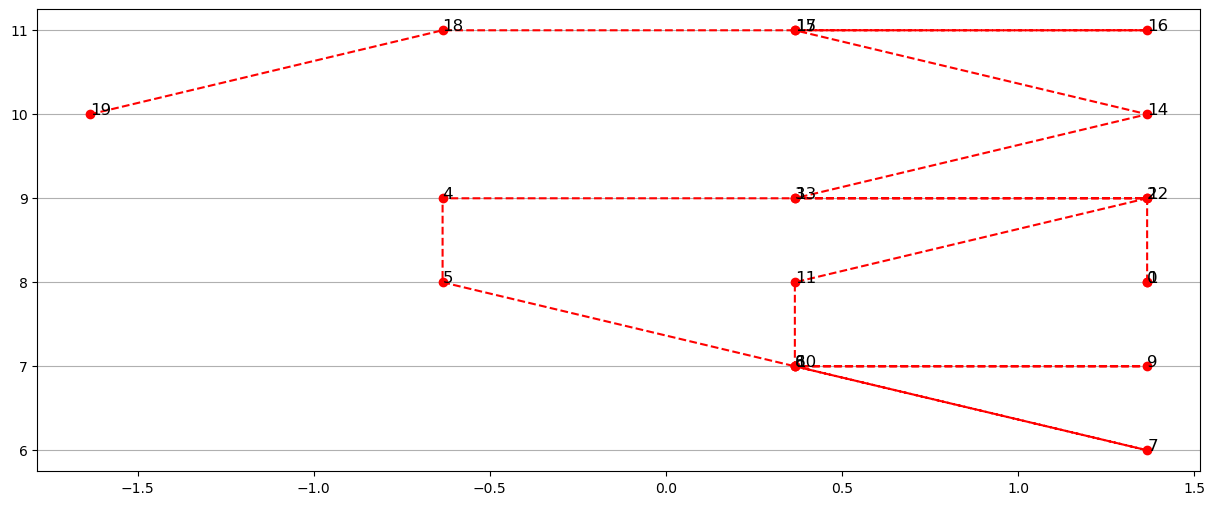

In [4]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
episode.world.viz(ax=ax, agent=episode.agent, config=episode.config)
plt.show()

# Policy Guid agent action history
----

In [7]:
episode = Episode.new()

In [ ]:
for step in range(20):
    pred = episode.policy.forward(torch.tensor(episode.state.to_tensor()))

    print(f"pred = {pred}, sum_pred = {torch.sum(pred)}")

    action_idx = torch.argmax(pred)
    # agent.take_action(action=Action.create_from(config=config, action_idx=action_idx))

pred = tensor([0.3067, 0.1672, 0.1081, 0.0292, 0.0534, 0.0714, 0.1188, 0.1323, 0.0129],
       grad_fn=<SoftmaxBackward0>), sum_pred = 1.0


/var/folders/lp/2szp3mwx2412g620qhnp3c680000gn/T/ipykernel_42397/3999798790.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = episode.policy.forward(torch.tensor(episode.state.to_tensor()))
/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


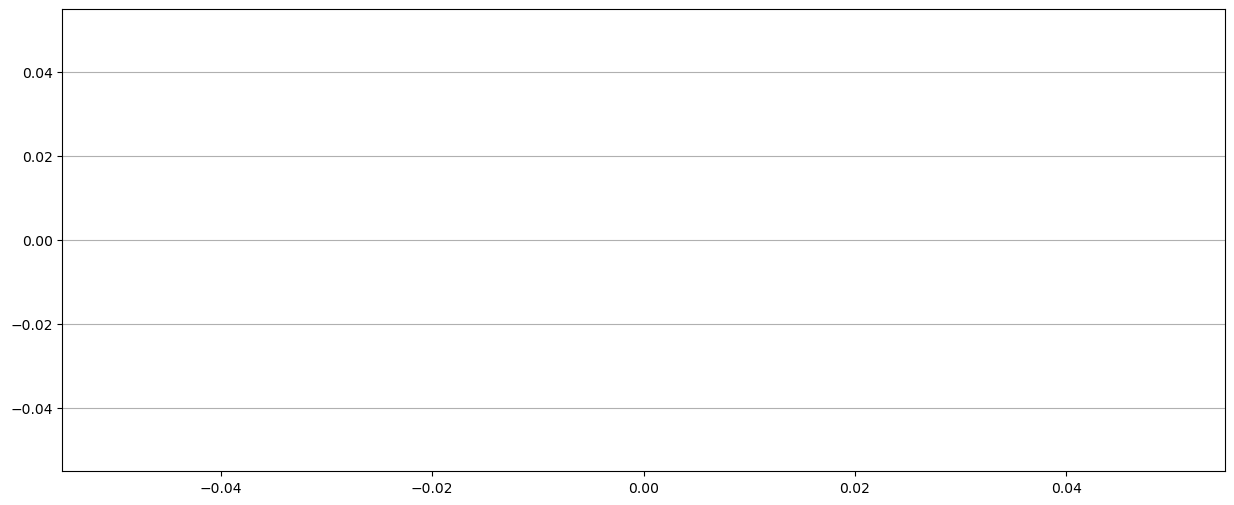

In [8]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
episode.world.viz(ax=ax, agent=episode.agent, config=episode.config)
plt.show()